**Please enter your name and email in the textbox below, and state whether or not you are planning to take the next available Module 1 Assessment.  This way, we will make sure you receive feedback on the assignment as soon as possible.**

*Name*: Khai Nguyen

*Email*: khailuu.nguyen@sjsu.edu

*I plan to take the next available Module 1 Assessment*: ***Yes***

# Module 1, Part 1

Please complete this assignment in Google Colab.  The assignment for Module 2 will be completed in a Jupyter Notebook.  We will alternate between the two environments so that you can get experience with both.

Each of you is assigned to a Track numbered from 1 to 7.  Your Track will posted on Canvas and will be the same across all homeworks.  Members of your group will be assigned to the same track so that you can more easily help each other with assignment questions.

There are two files distributed with this assignment: 


*   cmpe_188_diabetes.csv is the dataset for this assignment
*   DataDictionary.csv provides supplemental information about what the different attributes of the dataset.

Please submit all parts of the Module 1 assignment as 1 notebook in the Canvas assignment for Module 1 ("Module 1 Homework).

# Section 1: Basic Initialization 



## Setting up your environment  
In this module, you will be using the pandas, matplotlib, and seaborn libraries, among others.  [Pandas](https://pandas.pydata.org/docs/) makes it easy to manipulate datasets, and 
[matplotlib](https://matplotlib.org/stable/tutorials/index) and [seaborn](https://seaborn.pydata.org/tutorial.html) provide powerful visualization tools.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns

##  Loading the data

Now we authenticate a Google Drive client to mount your drive and access the data file.

**Make sure to follow the interactive instructions.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Update the code below with the file path where you have uploaded the diabetes dataset onto your Google Drive.


In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Data/cmpe_188_diabetes.csv"     # change the file path according to your file's location
df = pd.read_csv(file_path)

In [ ]:
df['icu_admit_source'].isnull().sum()

240

In [ ]:
df.head()

Unnamed: 0  encounter_id  ...  temperature_apache  bun_min
0           1        214826  ...                39.3     30.0
1           2        246060  ...                35.1      9.0
2           3        276985  ...                36.7      NaN
3           4        262220  ...                34.8      NaN
4           5        201746  ...                36.7      NaN

[5 rows x 189 columns]


The code below sets the index to the dataframe to be the column "Unnamed: 0" (and then drops the column as it is no longer needed).  The index of a dataframe is the labels for the rows of the dataframe and can be set to a single value or a set of values (e.g., multiple columns together can serve as an index), both numbers and strings. For more information and examples, please go to: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html


In [ ]:
df.index

RangeIndex(start=0, stop=130157, step=1)

In [ ]:
df.index = df['Unnamed: 0']
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.head()

encounter_id  hospital_id  ...  temperature_apache  bun_min
Unnamed: 0                             ...                             
1                 214826          118  ...                39.3     30.0
2                 246060           81  ...                35.1      9.0
3                 276985          118  ...                36.7      NaN
4                 262220          118  ...                34.8      NaN
5                 201746           33  ...                36.7      NaN

[5 rows x 188 columns]

### 1. Rename the index from 'Unnamed: 0' to "DF Index"

In [ ]:
df.index.rename('DF Index', inplace=True)

### 2. How many rows and columns does the dataset have?  Please write code to extract these values, and print them out.

In [ ]:
rows = df.shape[1]
cols = df.shape[0]
print('Number of rows ' + str(rows) + ", number of columns " + str(cols))

Number of rows 188, number of columns 130157


### 3. Use the pandas decribe() function to get a sense of the data in the dataset.

In [ ]:
df.describe()

encounter_id    hospital_id  ...  temperature_apache        bun_min
count  130157.000000  130157.000000  ...       123546.000000  116423.000000
mean   213000.856519     106.102131  ...           36.420638      23.554154
std     38109.828146      63.482277  ...            0.857584      18.708332
min    147000.000000       1.000000  ...           32.100000       3.000000
25%    180001.000000      49.000000  ...           36.200000      12.000000
50%    213014.000000     112.000000  ...           36.500000      17.000000
75%    246002.000000     165.000000  ...           36.700000      29.000000
max    279000.000000     204.000000  ...           39.700000     113.090000

[8 rows x 182 columns]

## Handling categorical values

###4. Find the categorical features in the dataset.

In [ ]:
dfCategory = df.select_dtypes(include = ['object'])

In [ ]:
dfCategory.head()

ethnicity gender  ... icu_stay_type      icu_type
DF Index                    ...                            
1         Caucasian      M  ...         admit         CTICU
2         Caucasian      F  ...         admit  Med-Surg ICU
3         Caucasian      F  ...         admit  Med-Surg ICU
4         Caucasian      F  ...         admit         CTICU
5         Caucasian      M  ...         admit  Med-Surg ICU

[5 rows x 6 columns]

In [ ]:
df['icu_admit_source'].isnull().sum()

240

###5. What are the different values each of the categorical feature can have?

In [ ]:
dfCategory.describe()

ethnicity  gender  ... icu_stay_type      icu_type
count      128570  130091  ...        130157        130157
unique          6       2  ...             3             8
top     Caucasian       M  ...         admit  Med-Surg ICU
freq       100236   70518  ...        124741         71468

[4 rows x 6 columns]

In [ ]:
dfCategory.describe().iloc[1, :] #dfCategory.describe() will give info about new data set and unique row is what we need and its index is 1

ethnicity                 6
gender                    2
hospital_admit_source    15
icu_admit_source          5
icu_stay_type             3
icu_type                  8
Name: unique, dtype: object

###6. Encode the categorical features as numerical features

Hint: Use [Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
for i in dfCategory.columns:
  le.fit(df[i])
  df[i] = le.transform(df[i])

In [ ]:
df.head()

encounter_id  hospital_id  ...  temperature_apache  bun_min
DF Index                             ...                             
1               214826          118  ...                39.3     30.0
2               246060           81  ...                35.1      9.0
3               276985          118  ...                36.7      NaN
4               262220          118  ...                34.8      NaN
5               201746           33  ...                36.7      NaN

[5 rows x 188 columns]

We can see that rows like ethinicity and gender changed from categorical values to number values

# Section 2: Data Quality 

## Data Quality Analysis

### 1. What are the data quality issues that you notice in the dataset?

Missing data is the most prominent, there may be other that I don't know yet

### 2. How many missing values are present in the *temp_apache* column

In [ ]:
# Documentation for the isnull function is available here: https://pandas.pydata.org/docs/reference/api/pandas.isnull.html 
df['temp_apache'].isnull().sum()

6611

### 3. Find the top 5 columns with the most missing values.


In [ ]:
df.isnull().sum().sort_values(ascending = False).head() # .sum() return a Series which can be chained with commands further more

h1_bilirubin_max    119861
bilirubin_max       119861
h1_bilirubin_min    119861
h1_albumin_max      119005
h1_albumin_min      119005
dtype: int64

### 3. Find the columns that have missing values in the specified range.

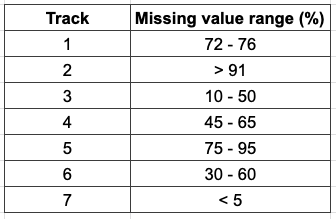

In [ ]:
# create a missing value table for all rows
missing_range = df.isnull().sum() * 100/len(df)

In [ ]:
# track 6, first get any value that is < 60 then > 30
missing_filter = missing_range[missing_range< 60]
missing_filter = missing_filter[missing_filter> 30]

In [ ]:
missing_filter.head()

urineoutput_apache    48.531389
d1_albumin_max        54.861437
d1_albumin_min        54.861437
d1_bilirubin_max      58.955723
d1_bilirubin_min      58.955723
dtype: float64

### 4. Drop (remove from the dataframe) the columns based on a missing value threshold


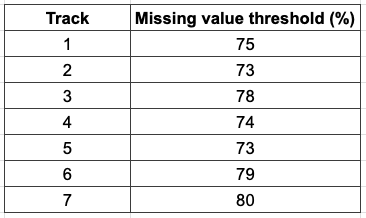

In [ ]:
df.shape

(130157, 188)

In [ ]:
missing_filter = missing_range[missing_range> 79]

In [ ]:
# missing_filter is type panda Series, https://pandas.pydata.org/docs/reference/api/pandas.Series.html
# use axes to get the list of row axis labels and drop these axis in the original table
for i in missing_filter.axes:
  df = df.drop(i, axis=1)

In [ ]:
df.shape

(130157, 152)

As we can see, columns drops from 188 to 152, so we successfully drop columns

## Data Imputation Strategies

In this section, you will experiment with 3-5 replacement strategies and evaluate their effectiveness.


###5. How many values of the feature corresponding to your track are missing?

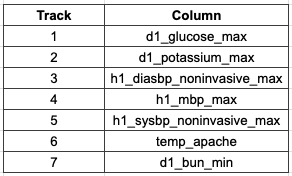

In [ ]:
df['temp_apache'].isnull().sum()

6611

**The sample code below shows imputation** for the *temp_apache* column which represents the temperature measured during the first 24 hours after a patient was admitted into the hospital. It is measured in Celsius. 

In [ ]:
from scipy import stats

most_freq_gluc, count = stats.mode(df['temp_apache'])

most_freq_gluc = int(most_freq_gluc) # which temperature occurs most frequently in the dataset
most_freq_gluc

36

In [ ]:
df['temp_apache'].describe()

count    123546.000000
mean         36.420638
std           0.857584
min          32.100000
25%          36.200000
50%          36.500000
75%          36.700000
max          39.700000
Name: temp_apache, dtype: float64

In [ ]:
# Create a copy of the column where we will be filling in the missing values

df['temp_apache_mode'] = df['temp_apache'].copy()

In [ ]:
df['temp_apache_mode'].replace(np.nan, most_freq_gluc, inplace=True)

In [ ]:
df['temp_apache'].describe()

count    123546.000000
mean         36.420638
std           0.857584
min          32.100000
25%          36.200000
50%          36.500000
75%          36.700000
max          39.700000
Name: temp_apache, dtype: float64

In [ ]:
df['temp_apache_mode'].describe()

count    130157.000000
mean         36.399273
std           0.840610
min          32.100000
25%          36.100000
50%          36.400000
75%          36.700000
max          39.700000
Name: temp_apache_mode, dtype: float64

**Below is the histogram of the column 'temp_apache' column before and after the imputation.**

The histogram shows the frequency of each value in the data (or when used for continues data, it first bins the values into discrete buckets) and is a good way to get a sense of the distribution of the data.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes



Text(0, 0.5, 'count')

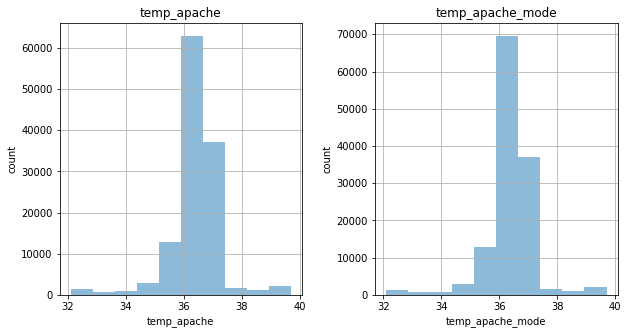

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
d1_glucose_max_mode = pd.DataFrame(df[['temp_apache','temp_apache_mode']])
d1_glucose_max_mode.hist(alpha=0.5, sharex=True, ax=ax)
ax[0].set_xlabel("temp_apache")
ax[0].set_ylabel("count")
ax[1].set_xlabel("temp_apache_mode")
ax[1].set_ylabel("count")

### 6. Add code for your replacement strategies below.

Replacement strategy-1:

In [ ]:
# first strategy will be filling with mean values

In [ ]:
df['temp_apache_mean'] = df['temp_apache'].copy()

In [ ]:
df['temp_apache_mean'].replace(np.nan, df['temp_apache'].mean(), inplace=True)

In [ ]:
df['temp_apache'].describe()

count    123546.000000
mean         36.420638
std           0.857584
min          32.100000
25%          36.200000
50%          36.500000
75%          36.700000
max          39.700000
Name: temp_apache, dtype: float64

In [ ]:
df['temp_apache_mean'].describe()

count    130157.000000
mean         36.420638
std           0.835521
min          32.100000
25%          36.200000
50%          36.420638
75%          36.700000
max          39.700000
Name: temp_apache_mean, dtype: float64

Replacement strategy-2:

In [ ]:
# second strategy will be replace values with median value
df['temp_apache_median'] = df['temp_apache'].copy()

In [ ]:
df['temp_apache_median'].describe()

count    123546.000000
mean         36.420638
std           0.857584
min          32.100000
25%          36.200000
50%          36.500000
75%          36.700000
max          39.700000
Name: temp_apache_median, dtype: float64

In [ ]:
# axis 0 refers to rows and fill them with median
df['temp_apache_median'].replace(np.nan, df['temp_apache'].median(axis = 0), inplace=True)

In [ ]:
df['temp_apache_median'].isnull().sum()

0

In [ ]:
df['temp_apache_median'].describe()

count    130157.000000
mean         36.424669
std           0.835703
min          32.100000
25%          36.200000
50%          36.500000
75%          36.700000
max          39.700000
Name: temp_apache_median, dtype: float64

Replacement strategy-3: 

In [ ]:
# third strategy would be drop missing value
# have to create a new panda Series for drop value since drop value in a single column doesn't do anything, as far as I tried
drop_value = df['temp_apache'].copy()

In [ ]:
drop_value

DF Index
1         39.3
2         35.1
3         36.7
4         34.8
5         36.7
          ... 
130153    36.2
130154    36.4
130155    32.9
130156    35.5
130157    37.1
Name: temp_apache, Length: 130157, dtype: float64

In [ ]:
drop_value = drop_value.rename("temp_apache_drop")

In [ ]:
drop_value.dropna(inplace = True)

In [ ]:
drop_value.describe()

count    123546.000000
mean         36.420638
std           0.857584
min          32.100000
25%          36.200000
50%          36.500000
75%          36.700000
max          39.700000
Name: temp_apache_drop, dtype: float64

In [ ]:
df['temp_apache'].describe()

count    123546.000000
mean         36.420638
std           0.857584
min          32.100000
25%          36.200000
50%          36.500000
75%          36.700000
max          39.700000
Name: temp_apache, dtype: float64

In [ ]:
drop_value.isnull().sum()

0

In [ ]:
df["temp_apache"].isnull().sum()

6611

Replacement strategy-4 (optional): 

Replacement strategy-5 (optional): 

### 7. Create a table that shows how different replacement strategies affect dataset properties

* Dataset properties can be described in terms of basic statistics such as mean, median, mode, standard deviation 
* Which of the replacement strategies do you think works best in terms of preserving overall dataset properties?

In [ ]:
table_compare = pd.concat([df['temp_apache'].describe(),df['temp_apache_mean'].describe(), df['temp_apache_median'].describe(), drop_value.describe()], axis = 1)

In [ ]:
table_compare

temp_apache  temp_apache_mean  temp_apache_median  temp_apache_drop
count  123546.000000     130157.000000       130157.000000     123546.000000
mean       36.420638         36.420638           36.424669         36.420638
std         0.857584          0.835521            0.835703          0.857584
min        32.100000         32.100000           32.100000         32.100000
25%        36.200000         36.200000           36.200000         36.200000
50%        36.500000         36.420638           36.500000         36.500000
75%        36.700000         36.700000           36.700000         36.700000
max        39.700000         39.700000           39.700000         39.700000

I think dropping missing value works best in terms of preserving overall dataset properties. That is because drop missing values does not add any new data therefore statistics like mean, std, etc. are all kept. Then it would be fill missing values with mean then median

In [ ]:
# now we need to drop 2 columns temp_apache_mean and temp_apache_median
df.drop(labels = ['temp_apache_mean', 'temp_apache_median'], axis = 1, inplace = True)


### 8. Explore whether your best replacement strategy distorts the properties of some categories of patients/observations more than others

* Identify 2 or more categories (subsets) of patients (eg: 'ethnicity' is an example category) 
* Apply the best performing replacement strategy based on your conclusions in the previous question
* Investigate whether this strategy affects different categories of patients differently
* Summarize your findings

In [ ]:
# need to find if missing values is the best strategy?

In [ ]:
df.isnull().sum()

encounter_id                  0
hospital_id                   0
age                        4988
bmi                        4490
elective_surgery              0
                          ...  
diasbp_noninvasive_max    11339
sysbp_noninvasive_max     11330
temperature_apache         6611
bun_min                   13734
temp_apache_mode              0
Length: 153, dtype: int64

We will choose age and bmi to explore replacement strategy. 

In [ ]:
age_drop = df['age'].copy()

In [ ]:
# length of the column before we drop missing values
len(age_drop)

130157

In [ ]:
age_drop.isnull().sum()

4988

In [ ]:
age_drop.describe()

count    125169.000000
mean         61.995103
std          16.822880
min           0.000000
25%          52.000000
50%          64.000000
75%          75.000000
max          89.000000
Name: age, dtype: float64

In [ ]:
age_drop.dropna(inplace = True)

In [ ]:
# length of column after we drop missing values
len(age_drop)

125169

The length decreased, so we successfully dropped missing values

In [ ]:
age_drop.isnull().sum()

0

In [ ]:
age_drop.describe()

count    125169.000000
mean         61.995103
std          16.822880
min           0.000000
25%          52.000000
50%          64.000000
75%          75.000000
max          89.000000
Name: age, dtype: float64

We can see that the whole data characteristics have not been changed

In [ ]:
bmi_drop = df['bmi'].copy()

In [ ]:
bmi_drop.isnull().sum()

4490

In [ ]:
bmi_drop.describe()

count    125667.000000
mean         29.110260
std           8.262776
min          14.844926
25%          23.598006
50%          27.564749
75%          32.803127
max          67.814990
Name: bmi, dtype: float64

In [ ]:
bmi_drop.dropna(inplace = True)

In [ ]:
bmi_drop.isnull().sum()

0

In [ ]:
bmi_drop.describe()

count    125667.000000
mean         29.110260
std           8.262776
min          14.844926
25%          23.598006
50%          27.564749
75%          32.803127
max          67.814990
Name: bmi, dtype: float64

Again, the data characteristics are the same after removing missing values. Therefore, this strategy does not affect different categories of patients differently

### 9. Fill in the missing values of *icu_admit_source* feature.

In [ ]:
df['icu_admit_source'].isnull().sum()

0

Since 'icu_admit_source' doesn't have missing values, we don't need to fill

# Module 1, Part 2

# Section 1: Sampling

## Reducing dataset size

Note that **diabetes_mellitus** is the target variable for this dataset.

### 1. Apply random sampling without replacement to the diabetes data to create a sample that contains 10% of the original data

Hint: Use the pandas [sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) function.

In [ ]:
data_sampling = df.sample(frac =  0.1)

### 2. Are the properties of the sample comparable to that of the entire dataset?  

Explore several attribute values, e.g., mean age, mean BMI.

In [ ]:
data_sampling.age.describe()

count    12537.000000
mean        61.982452
std         16.863420
min          0.000000
25%         52.000000
50%         64.000000
75%         75.000000
max         89.000000
Name: age, dtype: float64

In [ ]:
df.age.describe()

count    125169.000000
mean         61.995103
std          16.822880
min           0.000000
25%          52.000000
50%          64.000000
75%          75.000000
max          89.000000
Name: age, dtype: float64

We can see that sampling data has higher mean and lower standard deviation, but still within acceptable range

In [ ]:
data_sampling.bmi.describe()

count    12574.000000
mean        29.025431
std          8.169664
min         14.844926
25%         23.552151
50%         27.464937
75%         32.866705
max         67.814990
Name: bmi, dtype: float64

In [ ]:
df.bmi.describe()

count    125667.000000
mean         29.110260
std           8.262776
min          14.844926
25%          23.598006
50%          27.564749
75%          32.803127
max          67.814990
Name: bmi, dtype: float64

There are some differences between sampling data and original data but they are acceptable

### 3. Apply stratified sampling to the (original) dataset based on the target variable (so that the fraction of samples belonging to class 0 and 1 match those of the original dataset) to create a sample that contains 10% of the original data

Hint: Use [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) operation on the target variable and create a sample dataset with the same target distribution


In [ ]:
strat_sampling = df.groupby(by = "diabetes_mellitus")

In [ ]:
# get 0.1 sample from each group and combine them together
strat_sample = strat_sampling.get_group(0).sample(frac = 0.1)

In [ ]:
strat_sample = strat_sample.append(strat_sampling.get_group(1).sample(frac = 0.1))

## Class balancing



### 4. Visualize the data to understand if there is a class imbalance (between the categories of the target variable), e.g., using a bar chart.  Use the data sample you generated using stratified sampling.

In [ ]:
import plotly.express as px

In [ ]:
d0 = len(strat_sample[strat_sample["diabetes_mellitus"] == 0])

In [ ]:
d1 = len(strat_sample[strat_sample["diabetes_mellitus"] == 1])

In [ ]:
data = pd.DataFrame({'count': [d0, d1], 'category': ['zero', 'one']})
data

count category
0  10201     zero
1   2815      one

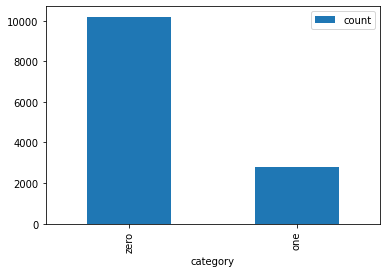

In [ ]:
data.plot.bar(x = 'category', y = "count")

There's more zero than one, therefore there's a class imbalance

###5. Use the [resample](https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html) method to upsample the minority class (so both classes are represented by the same number of samples) if there exists a class imbalance

In [ ]:
from sklearn.utils import resample

In [ ]:
# the number of new sample equal to the difference between zero sample and first sample
df_1_upsampled = resample(strat_sample[strat_sample["diabetes_mellitus"] == 1], n_samples = d0 - d1, replace = True)
strat_sample = strat_sample.append(df_1_upsampled)

In [ ]:
# this should print about 10201 samples
print(len(strat_sample[strat_sample["diabetes_mellitus"] == 1]))

10201


# Section 2: Normalization

### 1. Normalize the dataset (except the target variable)

Implement your own normalization using either the standardization or min-max scaling formulas we discussed in class. Use sklearn.standardScaler() or sklearn.MinMaxScaler() to compare their output to that of your implementation.

we will use min max scaling so that we dont need to care about underlying distribution of data

In [ ]:
# remove target variable before we normalize the dataset
# does this modify original strat_sample as well?
strat_train = strat_sample.loc[:, strat_sample.columns != "diabetes_mellitus"]
strat_min = strat_train.min()
strat_max = strat_train.max()

In [ ]:
# is readmission_status all 0 normal?
strat_sample["readmission_status"].describe()

count    20402.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: readmission_status, dtype: float64

In [ ]:
# my own min max scaler
# need to take care when strat_max - strat_min = 0
dif = strat_max - strat_min
dif[dif == 0] = 1

In [ ]:
strat_train_normalize0 = (strat_train - strat_min)/dif

In [ ]:
# use sklearn min max scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(strat_train)
strat_train_normalize1 = scaler.transform(strat_train)

In [ ]:
# my min max scaler
strat_train_normalize0.head()

encounter_id  hospital_id  ...   bun_min  temp_apache_mode
DF Index                             ...                            
16052         0.259993     0.369458  ...  0.099918          0.486842
12843         0.727083     0.674877  ...       NaN          0.447368
117309        0.770281     0.295567  ...  0.045417          0.855263
109578        0.592541     0.280788  ...  0.118085          0.513158
56004         0.839366     0.950739  ...  0.254337          0.605263

[5 rows x 152 columns]

In [ ]:
# sklearn mix max scaler
strat_train_normalize1

array([[0.25999273, 0.36945813, 0.84269663, ..., 0.48684211, 0.09991825,
        0.48684211],
       [0.72708264, 0.67487685, 0.7752809 , ..., 0.44736842,        nan,
        0.44736842],
       [0.77028092, 0.2955665 , 0.75280899, ..., 0.85526316, 0.04541739,
        0.85526316],
       ...,
       [0.67839935, 0.92118227, 0.71910112, ..., 0.59210526, 0.22708693,
        0.59210526],
       [0.96169581, 0.09852217, 1.        , ..., 0.67105263, 0.20891997,
        0.67105263],
       [0.16320192, 0.84236453, 0.7752809 , ..., 0.59210526, 0.17258607,
        0.59210526]])

As we can see, the result of my min max scaler is very similar to sklearn's

# Section 3: Correlation Analysis for Dimensionality Reduction


Note that categorical features should be encoded as numerical features before computing the covariance matrix.

### 1. Compute the pairwise covariance matrix for your data 

Use the standardized version of your data (Note: This makes the covariance matrix equivalent to the correlation matrix which is a normalized version of the covariance matrix).

Hint: The [Covariance](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html) function could be used for this purpose.

In [ ]:
# append target variable to our strat_train_normalize0 so that we can compute the covariance
# use pd.concat this to allow avoid highly defragmented data
strat_train_normalize0 = pd.concat((strat_train_normalize0, strat_sample["diabetes_mellitus"]), axis = 1)

In [ ]:
covariance = strat_train_normalize0.cov()

### 2. Visualize the covariance matrix as a heatmap

Hint: Feel free to use the [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function.

In [ ]:
import seaborn as sns

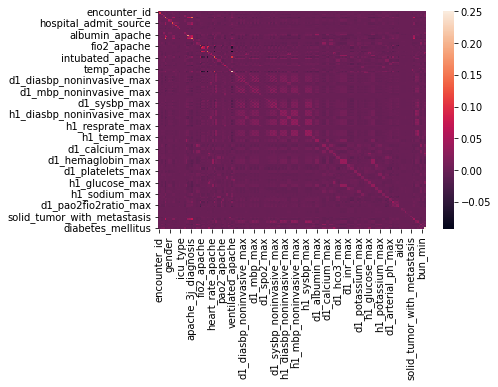

In [ ]:
sns.heatmap(covariance)

### 3. Create a pairplot of the data

Hint: Try using [pandas scatterplot](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) or [seaborn pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) 


In [ ]:
strat_train_normalize0.head()

encounter_id  hospital_id  ...  temp_apache_mode  diabetes_mellitus
DF Index                             ...                                     
16052         0.259993     0.369458  ...          0.486842                  0
12843         0.727083     0.674877  ...          0.447368                  0
117309        0.770281     0.295567  ...          0.855263                  0
109578        0.592541     0.280788  ...          0.513158                  0
56004         0.839366     0.950739  ...          0.605263                  0

[5 rows x 153 columns]

In [ ]:
strat_train_normalize0.shape

(20402, 153)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9c0e3ba10>,
      dtype=object)

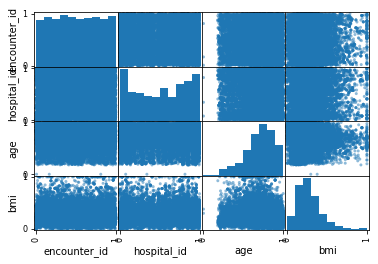

In [ ]:
# we will plot 4 data points, otherwise it will take very long
pd.plotting.scatter_matrix(strat_train_normalize0.iloc[:, :4])

### 4. Print the variance of all the features with respect to the target variable 

In [ ]:
covariance['diabetes_mellitus']

encounter_id             0.003066
hospital_id              0.001315
age                      0.010281
bmi                      0.014405
elective_surgery        -0.004117
                           ...   
sysbp_noninvasive_max    0.007699
temperature_apache      -0.000816
bun_min                  0.015154
temp_apache_mode        -0.000919
diabetes_mellitus        0.250012
Name: diabetes_mellitus, Length: 153, dtype: float64

In [ ]:
covariance

encounter_id  ...  diabetes_mellitus
encounter_id               0.083133  ...           0.003066
hospital_id               -0.001664  ...           0.001315
age                       -0.000183  ...           0.010281
bmi                        0.000727  ...           0.014405
elective_surgery          -0.000524  ...          -0.004117
...                             ...  ...                ...
sysbp_noninvasive_max     -0.001169  ...           0.007699
temperature_apache        -0.000270  ...          -0.000816
bun_min                    0.000128  ...           0.015154
temp_apache_mode          -0.000273  ...          -0.000919
diabetes_mellitus          0.003066  ...           0.250012

[153 rows x 153 columns]

### 5. Drop the features whose variance with respect to the target variable is below **0.0**




In [ ]:
# columns to delete
delete_columns = covariance['diabetes_mellitus'][covariance['diabetes_mellitus'] < 0.0]

In [ ]:
strat_train_normalize0.shape

(20402, 153)

In [ ]:
for i in delete_columns.index:
  strat_train_normalize0.drop([i], axis = 1, inplace = True)

In [ ]:
strat_train_normalize0.shape

(20402, 83)

As we can see, the columns from our data drops from 155 to 80 and we successfuly drop features

# Section 4: Principal Component Analysis

### 1. Perform PCA on the sampled dataset (use the data sample you generated using stratified sampling) 

Note that before applying PCA, you need to
1.   Standardize the dataset
2.   Drop or fill the null values in the dataset
3.   Convert all categorical variables to numerical variables 

Hint: The [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function in the scikit-learn library and its attributes (e.g., explained_variance_ratio_) will help you perform this task

In [ ]:
# our dataset is already standardize, fill null values in dataset and convert all categorical variables to numerical variables
strat_train_normalize0.describe()

encounter_id   hospital_id  ...       bun_min  diabetes_mellitus
count  20402.000000  20402.000000  ...  18418.000000       20402.000000
mean       0.501826      0.517528  ...      0.201562           0.500000
std        0.288327      0.314487  ...      0.178097           0.500012
min        0.000000      0.000000  ...      0.000000           0.000000
25%        0.251095      0.226601  ...      0.081751           0.000000
50%        0.499076      0.546798  ...      0.145336           0.500000
75%        0.750402      0.807882  ...      0.263421           1.000000
max        1.000000      1.000000  ...      1.000000           1.000000

[8 rows x 83 columns]

In [ ]:
strat_train_normalize0.shape

(20402, 83)

In [ ]:
strat_train_normalize0.dropna(inplace = True)

In [ ]:
strat_train_normalize0.shape

(136, 83)

It seems like I dropped a lot of missing rows

### 2. Perform PCA on the dataset and find how many principal components are required to identify a minimum of 70% of the variation in the dataset.





In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=9)

In [ ]:
pca_result = pca.fit(strat_train_normalize0)

In [ ]:
pca_result.explained_variance_ratio_.sum()

0.6938111228793827

So we need at least 9 principal components to achieve a minimum of 70% variation in the dataset

### 3. Visualize the dataset after using PCA to reduce the dataset to 2 dimensions

In [ ]:
pca = PCA(n_components= 2)

In [ ]:
pca = pca.fit(strat_train_normalize0)
pca_result = pca.transform(strat_train_normalize0)

In [ ]:
pca_result = pd.DataFrame(pca_result)

In [ ]:
pca_result

0         1
0   -0.639253  0.944102
1   -0.671966  0.403220
2    0.285277 -0.588501
3    0.078613 -0.999552
4    0.461462  0.226226
..        ...       ...
131  0.538985 -1.006374
132  0.538985 -1.006374
133 -0.778433  0.666986
134  0.538985 -1.006374
135  0.605638  0.902089

[136 rows x 2 columns]

In [ ]:
temp = strat_train_normalize0[["diabetes_mellitus"]].copy()

In [ ]:
temp = temp.reset_index()

In [ ]:
temp

DF Index  diabetes_mellitus
0       99980                  0
1      115886                  0
2       97021                  0
3      121687                  0
4      112938                  0
..        ...                ...
131    100944                  1
132    100944                  1
133     32523                  1
134    100944                  1
135     44877                  1

[136 rows x 2 columns]

In [ ]:
pca_result = pd.concat([pca_result, temp[["diabetes_mellitus"]]], axis = 1)

In [ ]:
pca_result

0         1  diabetes_mellitus
0   -0.639253  0.944102                  0
1   -0.671966  0.403220                  0
2    0.285277 -0.588501                  0
3    0.078613 -0.999552                  0
4    0.461462  0.226226                  0
..        ...       ...                ...
131  0.538985 -1.006374                  1
132  0.538985 -1.006374                  1
133 -0.778433  0.666986                  1
134  0.538985 -1.006374                  1
135  0.605638  0.902089                  1

[136 rows x 3 columns]

In [ ]:
import seaborn as sn

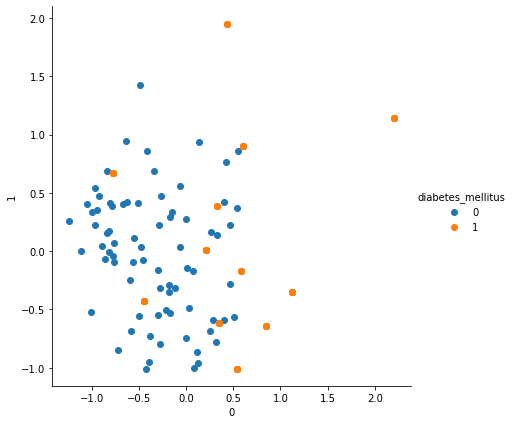

In [ ]:
# inspried by code from https://medium.com/@ashwin8april/dimensionality-reduction-and-visualization-using-pca-principal-component-analysis-8489b46c2ae0
sn.FacetGrid(pca_result, hue = "diabetes_mellitus", height = 6).map(plt.scatter, 0, 1).add_legend()
plt.show()

# Part 3

### Setting up your environment  
In this module, you will be using the pandas, matplotlib, and seaborn libraries, among others.  [Pandas](https://pandas.pydata.org/docs/) makes it easy to manipulate datasets, and 
[matplotlib](https://matplotlib.org/stable/tutorials/index) and [seaborn](https://seaborn.pydata.org/tutorial.html) provide powerful visualization tools.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns

Now we authenticate a Google Drive client to mount your drive and access the data file.

**Make sure to follow the interactive instructions.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# this is to reset our df
file_path = "/content/drive/MyDrive/Colab Notebooks/Data/cmpe_188_diabetes.csv"     # change the file path according to your file's location
df_graph = pd.read_csv(file_path)

# Module 1, Part 3

# Section 1: Data Visualization & Insights


## Visualization of continuous variables

The table below lists the variable that is assigned to each track.

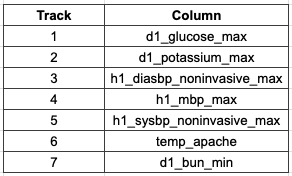


### 1\. Bin the variable assigned to your track into several bins and visualize it relative to the target variable, using a stacked bar chart (e.g., see figure below)

Feel free to experiment with different numbers of bins to see which binning may reveal some interesting insights. 

Hints: 
* [cut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) and [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) can be useful tools for the binning
* [Histogram (Seaborn)](https://seaborn.pydata.org/generated/seaborn.histplot.html) can help with the visualization




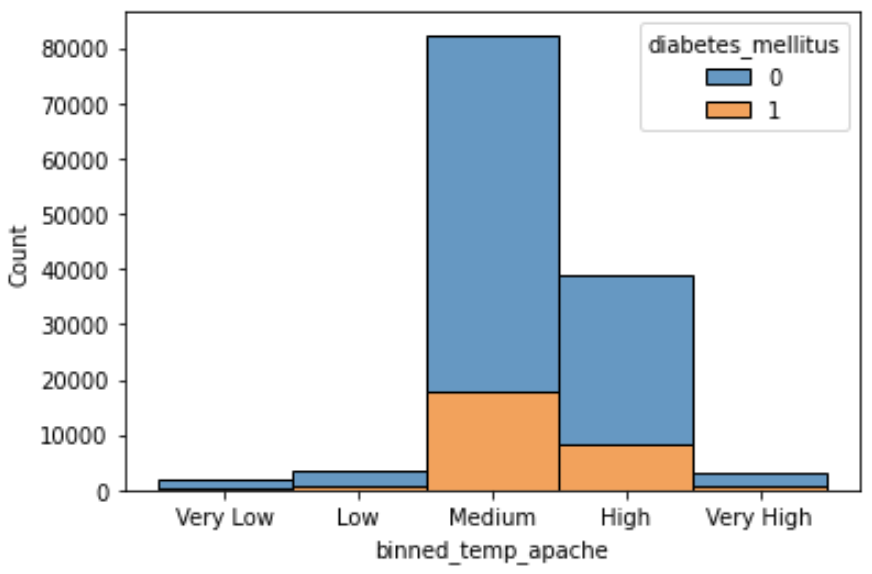

In [ ]:
df_graph["temp_apache"]

0         39.3
1         35.1
2         36.7
3         34.8
4         36.7
          ... 
130152    36.2
130153    36.4
130154    32.9
130155    35.5
130156    37.1
Name: temp_apache, Length: 130157, dtype: float64

In [ ]:
binned_temp_apache = pd.cut(df_graph["temp_apache"], 4)

In [ ]:
binned_temp_apache[10:20]

10    (35.9, 37.8]
11    (35.9, 37.8]
12    (35.9, 37.8]
13    (35.9, 37.8]
14    (35.9, 37.8]
15    (35.9, 37.8]
16    (35.9, 37.8]
17    (35.9, 37.8]
18    (35.9, 37.8]
19    (35.9, 37.8]
Name: temp_apache, dtype: category
Categories (4, interval[float64, right]): [(32.092, 34.0] < (34.0, 35.9] < (35.9, 37.8] <
                                           (37.8, 39.7]]

In [ ]:
binned_temp_apache = pd.DataFrame(binned_temp_apache)

In [ ]:
# need to convert temp_apache from category to string so that seaborn can work with it
binned_temp_apache["temp_apache"] = binned_temp_apache["temp_apache"].astype(str)

In [ ]:
binned_temp_apache['diabetes_mellitus'] = df_graph["diabetes_mellitus"].copy()

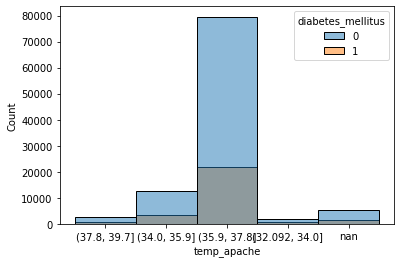

In [ ]:
sns.histplot(binned_temp_apache, x = "temp_apache", hue = "diabetes_mellitus")

### 2\. Add your observations about the data based on the figure you have created.

Most of the admitted patients have normal temperature (35.9 - 37.8)

## Visualization of discrete variables

### 3\. Visualize the distibution of Age values (e.g., using a histogram).  Example output is shown below. 



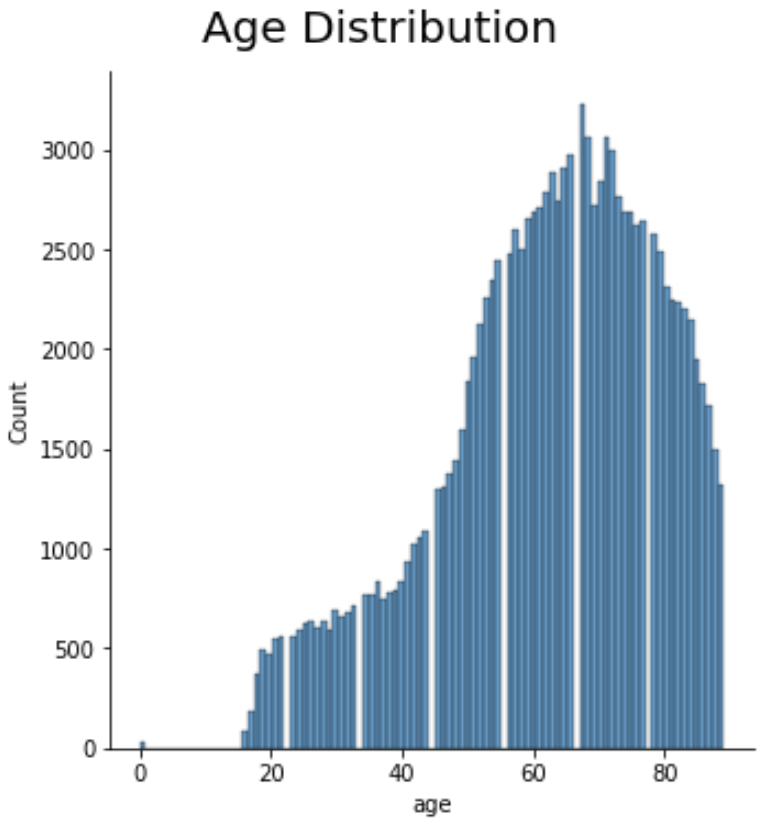


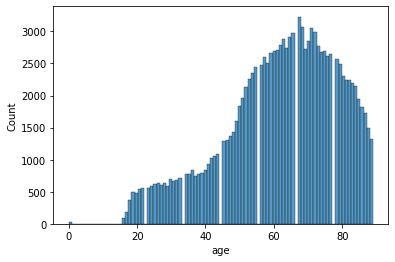

In [ ]:
# add your code here
sns.histplot(df_graph, x = "age")

### 4\. Add your observations about the data based on the figure you have created.




Most of the data are in the age of 60 - 80. There's a upward trend for people from 20 - around 65. On the other hand, there's a downward trend for people from 65 - 80

### 5\. Aggregate the 'Age' column based on the number of records per age value.  The second image below shows the final output you should be getting.

Hints: 
* Use [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) method to aggregate the age column 
* The plot would have aggregated age values along the X-axis and the count along the Y-axis
* Visualize the distribution of the age before and after aggregation to witness the effect of the aggregation

Intermediate output based on second bullet above:



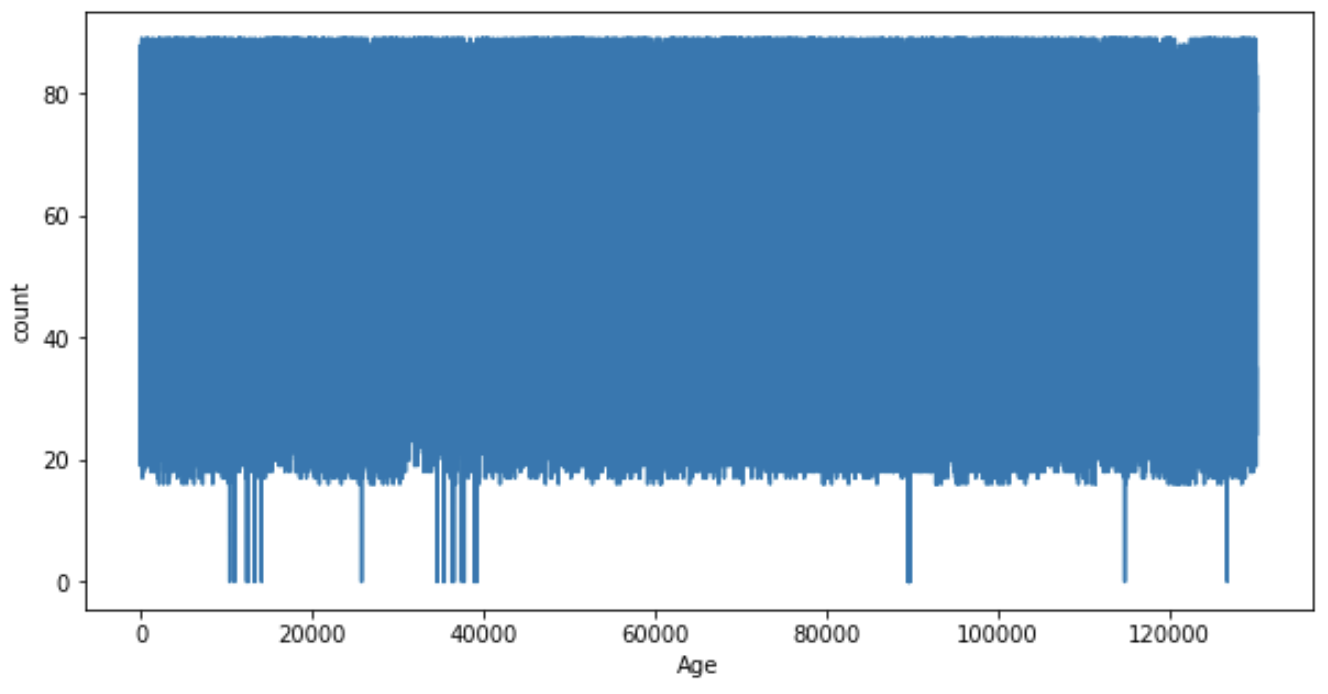


Final output:

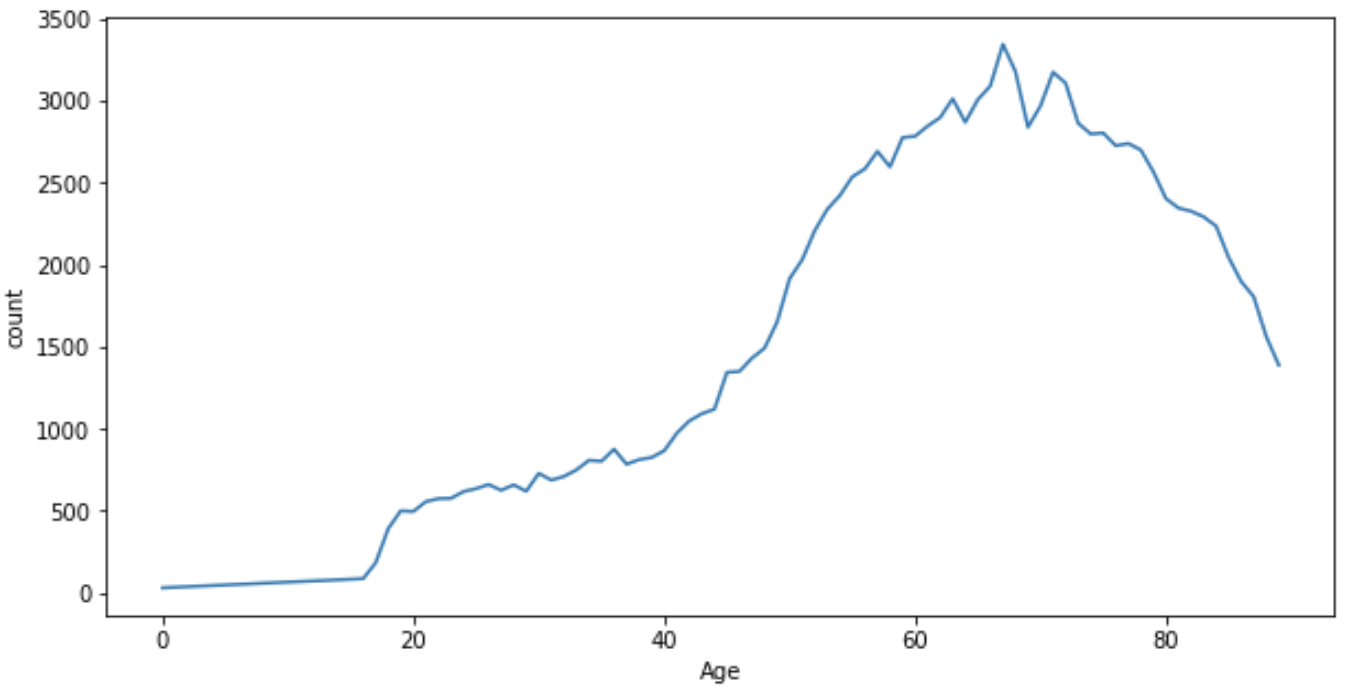

In [ ]:
df_age = df_graph.groupby(by = "age")

In [ ]:
df_age_size =  df_age.size()

In [ ]:
d = {"age": df_age_size.index, "count": df_age_size.values}

In [ ]:
d = pd.DataFrame(d)

In [ ]:
d

age  count
0    0.0     30
1   16.0     85
2   17.0    180
3   18.0    377
4   19.0    490
..   ...    ...
70  85.0   1953
71  86.0   1827
72  87.0   1723
73  88.0   1501
74  89.0   1326

[75 rows x 2 columns]

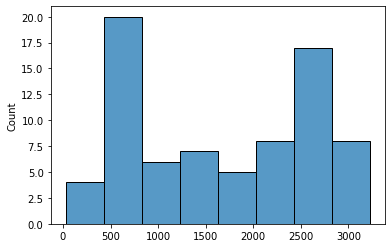

In [ ]:
sns.histplot(df_age_size)

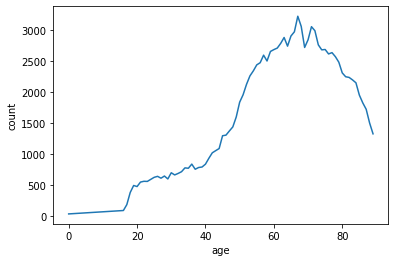

In [ ]:
sns.lineplot(data = d, x = "age", y = "count")

### 6\. Add your observations about the data based on the figure you have created.


Most people are in the age of 60 - 70

> The plot overall figure is same with just simply plot age column, but with a little bit less details and easier to see the overall trend



### 7\. Plot the number of records for each gender.  The final plot would look as the one shown below. 



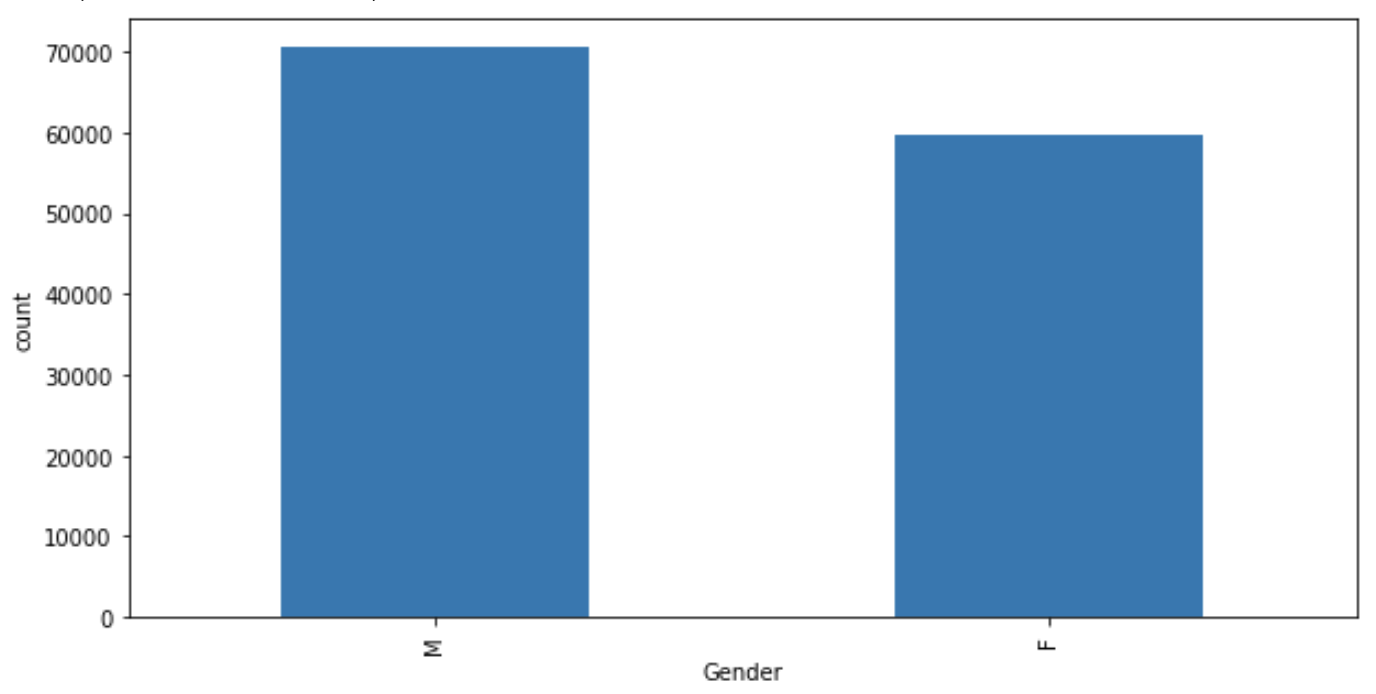

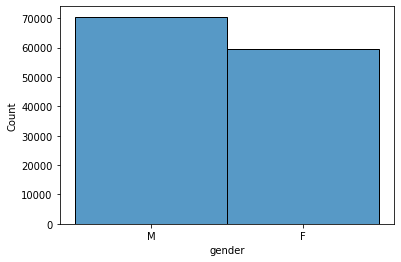

In [ ]:
# add your code here
sns.histplot(data = df_graph, x = "gender")

### 8\. Add your observations about the data based on the figure you have created.


There's more male than female, the difference is about 10000, which is a lot

### 9\. Visualize the distribution of data records in terms of ethnicity, using a pie chart.  The output should look like the figure shown below.



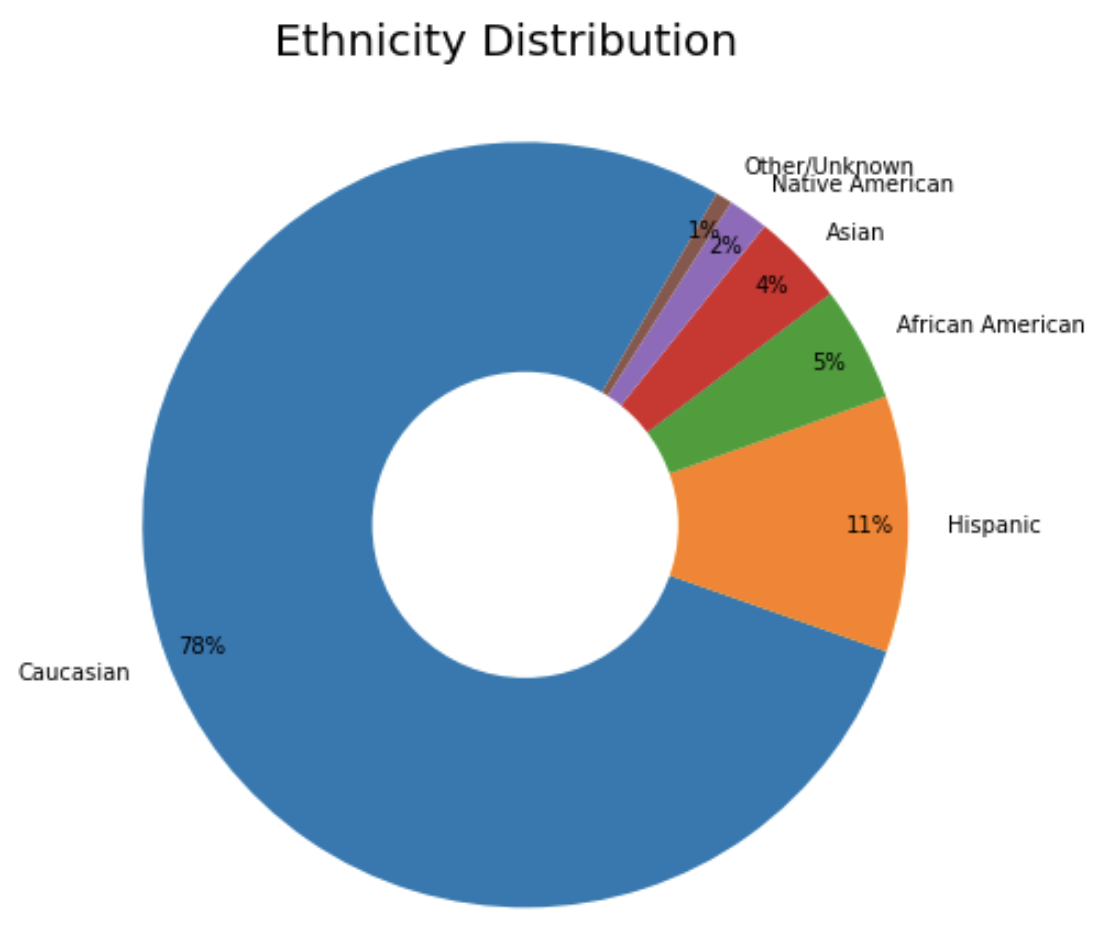

In [ ]:
# Create a pie chart
# The first argument to the function is the dataframe from which data will be extracted for display in the figure
# The "names" argument specifies the data frame column which contains the label 
fig = px.pie(df_graph, labels = "ethnicity", names = "ethnicity")
fig.show()

### 10\. Add your observations about the data based on the figure you have created.

The majority of data points are Caucasian, then African American

### 11\. Plot a histogram of the BMI attribute (sample output shown below)



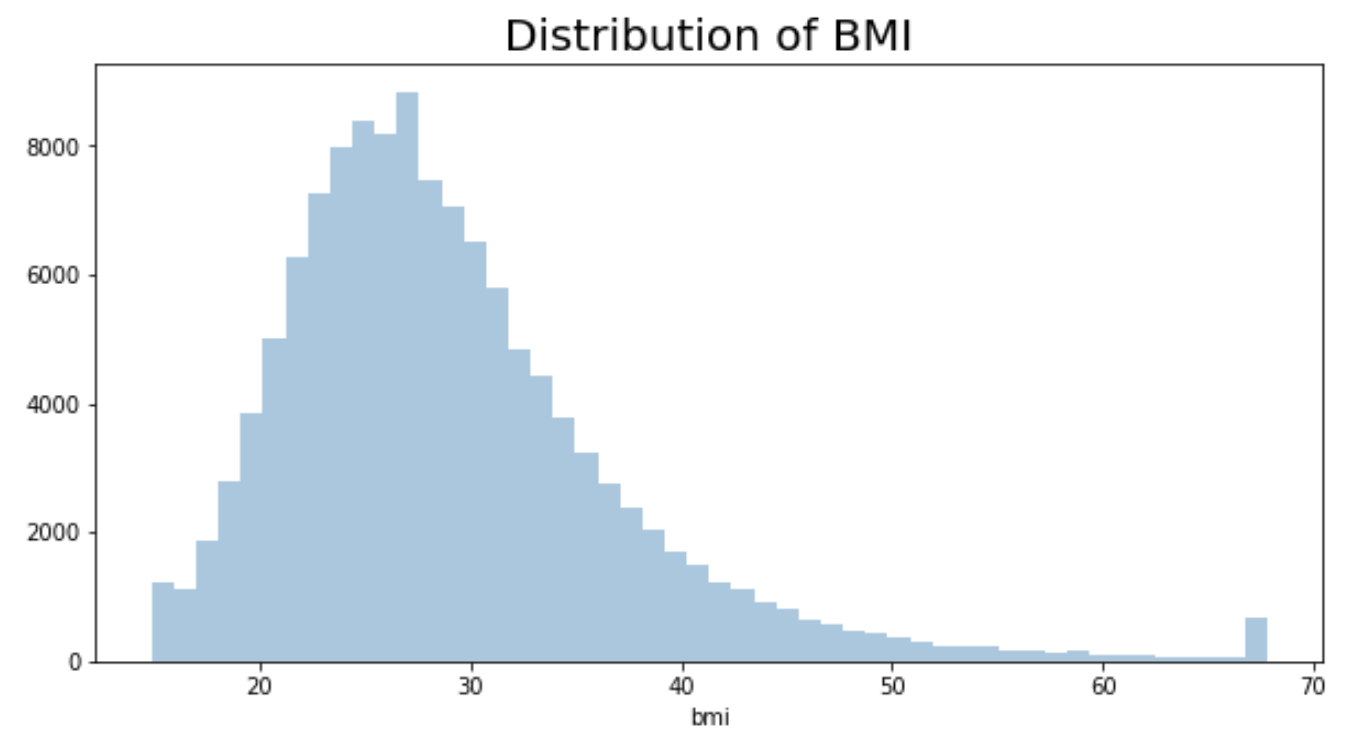

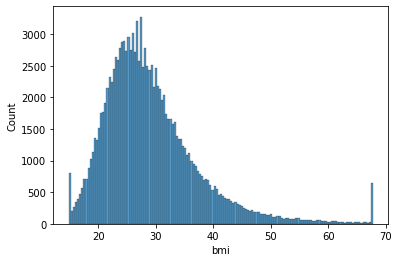

In [ ]:
# add your code here
sns.histplot(df["bmi"])

### 12\. Add your observations about the data based on the figure you have created.

The majority of BMI data points are in the range 25 - 30, which falls into the overweight range. Then there are people a spike in people with BMI near 70

### 13\. Plot a histogram of the target variable (sample output shown below) 



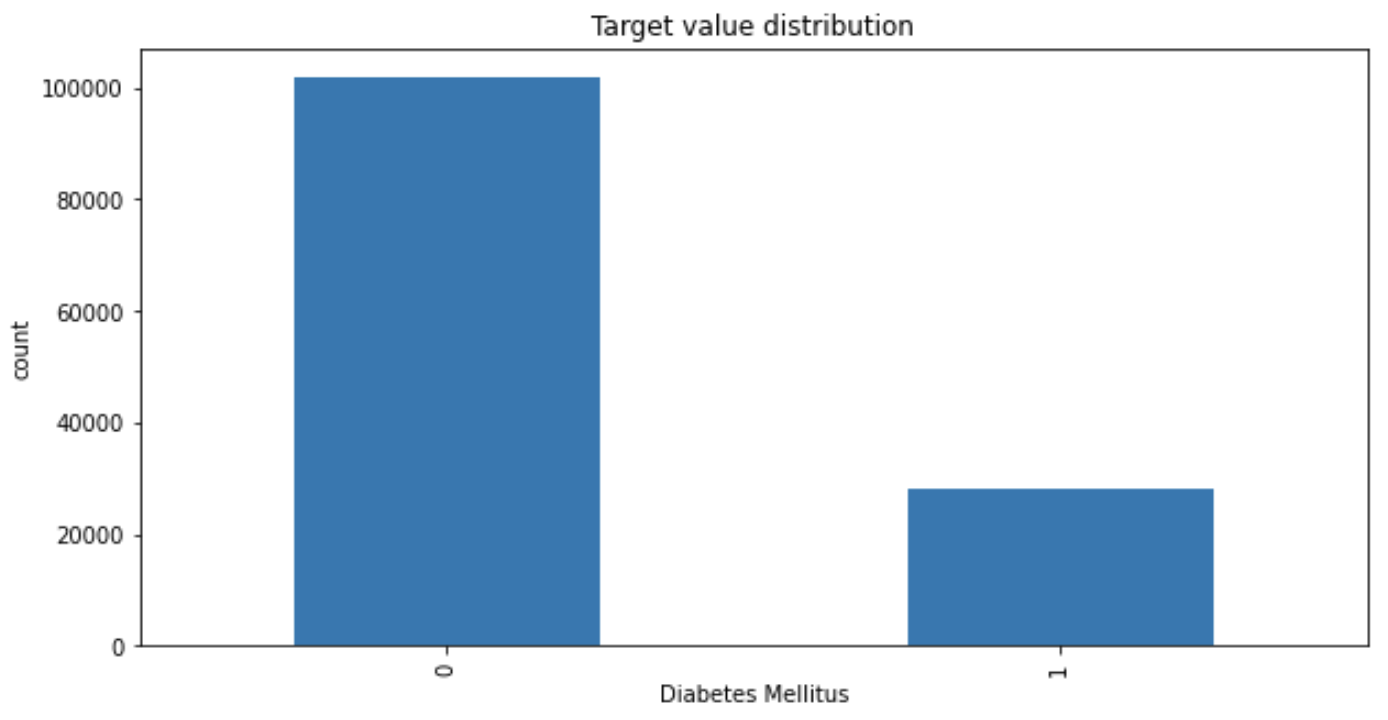

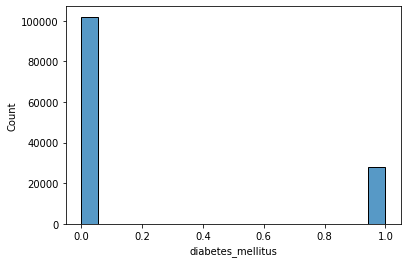

In [ ]:
# add your code here
sns.histplot(df_graph["diabetes_mellitus"])

### 14\. Add your observations about the data based on the figure you have created.

Most of the datapoints have negative diabetes results

# Section 2: Similarity and Distance Measures

In this part of the assignment, you will be creating a very simple wine recommender system using the [cosine similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) and [euclidean distance](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html) metrics.



## Pre-processing steps

### 1\. Import the data and set the title column to be the index of the data frame

In [ ]:
wine_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/wine_data.csv", index_col=0)
wine_data

wine_country  ...                grapes
title                                                             ...                      
El Enemigo Chardonnay 2018                             Argentina  ...            Chardonnay
Minuty M Rosé 2020                                        France  ...       Rosé wine Blend
Santi Infinito Rosé 2018                                   Italy  ...       Rosé wine Blend
Jansz Premium Rosé N.V.                                Australia  ...  Sparkling wine Blend
Balbach Riesling 2018                                    Germany  ...              Riesling
...                                                          ...  ...                   ...
Dutton-Goldfield Dutton Ranch Pinot Noir 2017      United States  ...            Pinot Noir
Tzora Vineyards Judean Hills Blanc 2018                   Israel  ...            Chardonnay
Claus Preisinger Kalkundkiesel 2019                      Austria  ...      White wine Blend
Pine Ridge Sparkling Chenin Blanc - Viognier N.V.  United States  ...  Sparkling wine Blend
Miraval Côtes de Provence Rosé 2019                       France  ...              Cinsault

[1781 rows x 5 columns]

### 2\. Find the categorical features and encode them using the [dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) method in Pandas instead of LabelEncoder.



In [ ]:
wine_data_dummies = pd.get_dummies(wine_data)

### 3\. Standardize the data using [standard scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(wine_data_dummies)

StandardScaler()

In [ ]:
# we need to columns for our new data, this can be taken by .columns attribute, but we need an array, so .values will give us the array
wine_encoded_scaled =  pd.DataFrame(scaler.transform(wine_data_dummies), columns = wine_data_dummies.columns.values, index = wine_data_dummies.index.values)

In [ ]:
wine_encoded_scaled

average_rating  ...  grapes_Zweigelt
El Enemigo Chardonnay 2018                               1.115390  ...         -0.05814
Minuty M Rosé 2020                                      -0.169822  ...         -0.05814
Santi Infinito Rosé 2018                                -1.026630  ...         -0.05814
Jansz Premium Rosé N.V.                                 -0.598226  ...         -0.05814
Balbach Riesling 2018                                    1.115390  ...         -0.05814
...                                                           ...  ...              ...
Dutton-Goldfield Dutton Ranch Pinot Noir 2017            1.115390  ...         -0.05814
Tzora Vineyards Judean Hills Blanc 2018                  0.686986  ...         -0.05814
Claus Preisinger Kalkundkiesel 2019                      0.258582  ...         -0.05814
Pine Ridge Sparkling Chenin Blanc - Viognier N.V.        0.686986  ...         -0.05814
Miraval Côtes de Provence Rosé 2019                     -0.598226  ...         -0.05814

[1781 rows x 171 columns]

## Wine Recommendations
In the following 2 exercises, you will be computing the top 10 wines that are "similar" to the wine assigned to your track, using cosine similarity and euclidean distance.



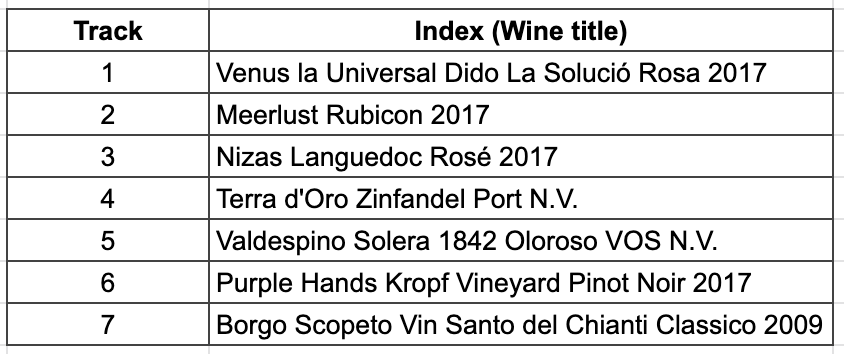

### 4\. Find the top 10 wines that are similar to the wine assigned to your track (based on cosine similarity) and show the wines along with the cosine similarity score for each wine and the wine assigned to your track.  

**Note: Your output should look like the table shown below:**


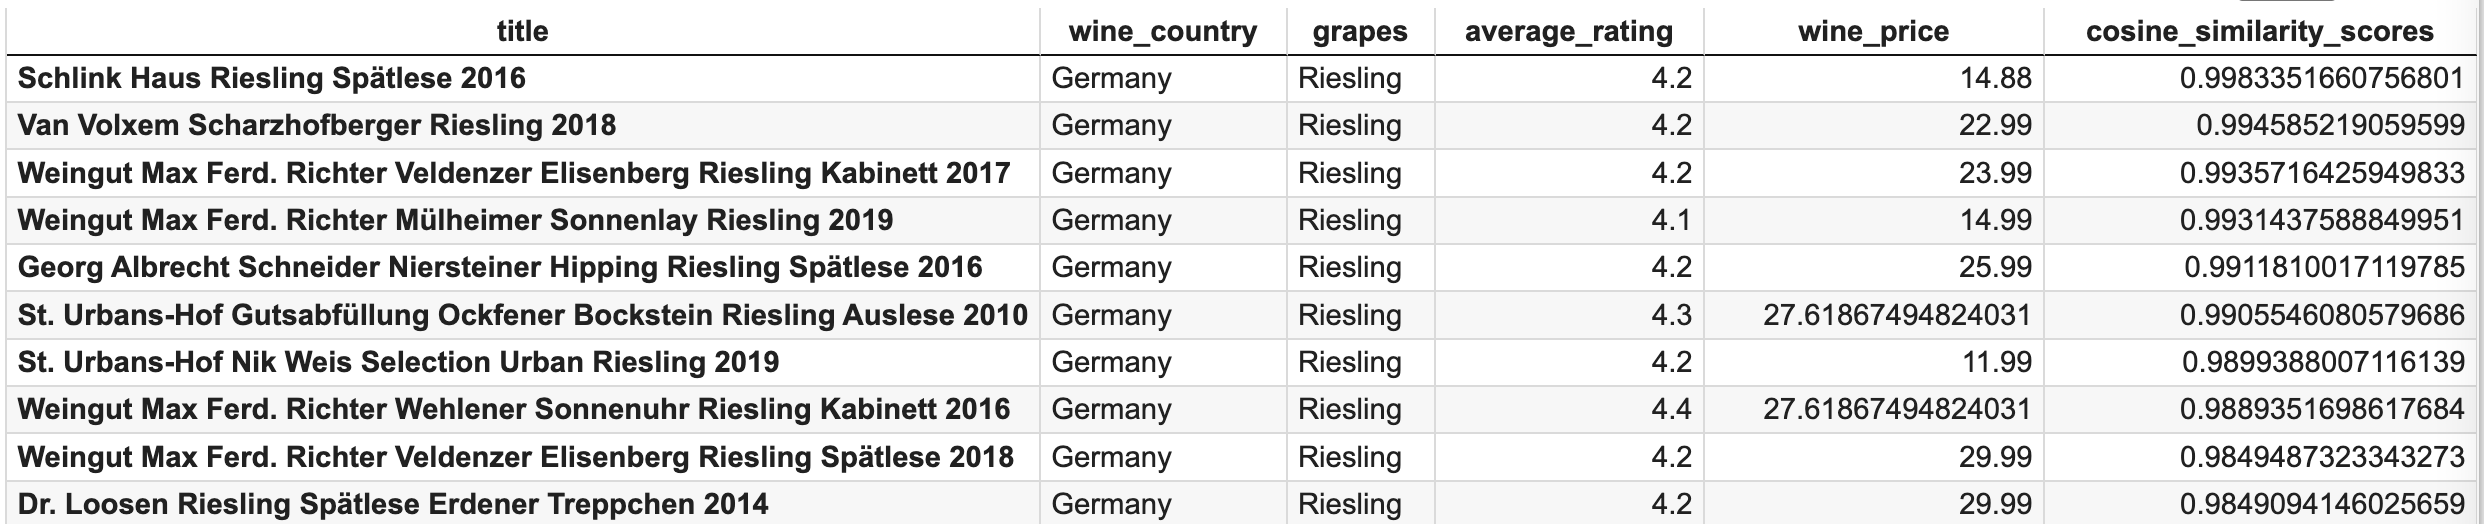

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# since the cosine_scores is the score with itself the index and columns will be the same
cosine_scores = pd.DataFrame(cosine_similarity(wine_encoded_scaled), index = wine_data.index.values, columns = wine_data.index.values)

In [ ]:
cosine_scores

El Enemigo Chardonnay 2018  ...  Miraval Côtes de Provence Rosé 2019
El Enemigo Chardonnay 2018                                           1.000000  ...                            -0.024147
Minuty M Rosé 2020                                                  -0.083800  ...                             0.048643
Santi Infinito Rosé 2018                                            -0.102011  ...                            -0.024455
Jansz Premium Rosé N.V.                                             -0.032064  ...                            -0.009140
Balbach Riesling 2018                                               -0.013872  ...                            -0.024643
...                                                                       ...  ...                                  ...
Dutton-Goldfield Dutton Ranch Pinot Noir 2017                       -0.043793  ...                            -0.040377
Tzora Vineyards Judean Hills Blanc 2018                              0.099414  ...                            -0.007730
Claus Preisinger Kalkundkiesel 2019                                 -0.024079  ...                            -0.011224
Pine Ridge Sparkling Chenin Blanc - Viognier N.V.                   -0.047856  ...                            -0.039151
Miraval Côtes de Provence Rosé 2019                                 -0.024147  ...                             1.000000

[1781 rows x 1781 columns]

In [ ]:
# skip the first element because that is the cosine with itself, then sort from highest to lowest
cosine_closest =  cosine_scores["Purple Hands Kropf Vineyard Pinot Noir 2017"].sort_values(ascending = False)[1:11]

In [ ]:
cosine_closest.index.values

array(['Clos du Val Pinot Noir 2017',
       'Shea Wine Cellars Estate Pinot Noir 2017',
       'Goldeneye Anderson Valley Pinot Noir 2017',
       'Martinelli Bella Vigna Pinot Noir 2018',
       'Hendry Hendry Vineyard Pinot Noir 2017',
       'Holloran La Chenaie Vineyard Pinot Noir 2014',
       'Arcadian Fiddlestix Vineyard Pinot Noir 2005',
       'Brooks Janus Pinot Noir 2017',
       'St. Innocent Momtazi Vineyard Pinot Noir 2016',
       'Archery Summit Pinot Noir 2018'], dtype=object)

In [ ]:
cosine_df = pd.DataFrame()

In [ ]:
for i in cosine_closest.index.values:
  # get the row of the time
  temp_df = wine_data.loc[i].copy()
  # add new column with cosine similarity
  temp_df["cosine_similarity_scores"] = cosine_closest[i]
  cosine_df = cosine_df.append(temp_df)

In [ ]:
cosine_df.drop("num_of_ratings", axis = 1, inplace = True)

In [ ]:
cosine_df

wine_country  ...  cosine_similarity_scores
Clos du Val Pinot Noir 2017                    United States  ...                  0.999996
Shea Wine Cellars Estate Pinot Noir 2017       United States  ...                  0.996957
Goldeneye Anderson Valley Pinot Noir 2017      United States  ...                  0.996623
Martinelli Bella Vigna Pinot Noir 2018         United States  ...                  0.996479
Hendry Hendry Vineyard Pinot Noir 2017         United States  ...                  0.996479
Holloran La Chenaie Vineyard Pinot Noir 2014   United States  ...                  0.996471
Arcadian Fiddlestix Vineyard Pinot Noir 2005   United States  ...                  0.996470
Brooks Janus Pinot Noir 2017                   United States  ...                  0.996470
St. Innocent Momtazi Vineyard Pinot Noir 2016  United States  ...                  0.996468
Archery Summit Pinot Noir 2018                 United States  ...                  0.996467

[10 rows x 5 columns]

### 5\. Same as 4 above but using Euclidean distance 

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances


In [ ]:
# since the euclidean_distance is the distance with itself the index and columns will be the same
euc_dist = pd.DataFrame(cosine_similarity(wine_encoded_scaled), index = wine_data.index.values, columns = wine_data.index.values)

In [ ]:
euc_dist

El Enemigo Chardonnay 2018  ...  Miraval Côtes de Provence Rosé 2019
El Enemigo Chardonnay 2018                                           1.000000  ...                            -0.024147
Minuty M Rosé 2020                                                  -0.083800  ...                             0.048643
Santi Infinito Rosé 2018                                            -0.102011  ...                            -0.024455
Jansz Premium Rosé N.V.                                             -0.032064  ...                            -0.009140
Balbach Riesling 2018                                               -0.013872  ...                            -0.024643
...                                                                       ...  ...                                  ...
Dutton-Goldfield Dutton Ranch Pinot Noir 2017                       -0.043793  ...                            -0.040377
Tzora Vineyards Judean Hills Blanc 2018                              0.099414  ...                            -0.007730
Claus Preisinger Kalkundkiesel 2019                                 -0.024079  ...                            -0.011224
Pine Ridge Sparkling Chenin Blanc - Viognier N.V.                   -0.047856  ...                            -0.039151
Miraval Côtes de Provence Rosé 2019                                 -0.024147  ...                             1.000000

[1781 rows x 1781 columns]

In [ ]:
# skip the first element because that is the distance with itself, then sort from highest to lowest
euc_closest =  euc_dist["Purple Hands Kropf Vineyard Pinot Noir 2017"].sort_values(ascending = False)[1:11]

In [ ]:
euc_closest

Clos du Val Pinot Noir 2017                      0.999996
Shea Wine Cellars Estate Pinot Noir 2017         0.996957
Goldeneye Anderson Valley Pinot Noir 2017        0.996623
Martinelli Bella Vigna Pinot Noir 2018           0.996479
Hendry Hendry Vineyard Pinot Noir 2017           0.996479
Holloran La Chenaie Vineyard Pinot Noir 2014     0.996471
Arcadian Fiddlestix Vineyard Pinot Noir 2005     0.996470
Brooks Janus Pinot Noir 2017                     0.996470
St. Innocent Momtazi Vineyard Pinot Noir 2016    0.996468
Archery Summit Pinot Noir 2018                   0.996467
Name: Purple Hands Kropf Vineyard Pinot Noir 2017, dtype: float64

In [ ]:
euc_df = pd.DataFrame()

In [ ]:
for i in cosine_closest.index.values:
  # get the row of the time
  temp_df = wine_data.loc[i].copy()
  # add new column with cosine similarity
  temp_df["cosine_similarity_scores"] = cosine_closest[i]
  euc_df = euc_df.append(temp_df)

In [ ]:
euc_df.drop("num_of_ratings", axis = 1, inplace = True)

In [ ]:
euc_df

wine_country  ...  cosine_similarity_scores
Clos du Val Pinot Noir 2017                    United States  ...                  0.999996
Shea Wine Cellars Estate Pinot Noir 2017       United States  ...                  0.996957
Goldeneye Anderson Valley Pinot Noir 2017      United States  ...                  0.996623
Martinelli Bella Vigna Pinot Noir 2018         United States  ...                  0.996479
Hendry Hendry Vineyard Pinot Noir 2017         United States  ...                  0.996479
Holloran La Chenaie Vineyard Pinot Noir 2014   United States  ...                  0.996471
Arcadian Fiddlestix Vineyard Pinot Noir 2005   United States  ...                  0.996470
Brooks Janus Pinot Noir 2017                   United States  ...                  0.996470
St. Innocent Momtazi Vineyard Pinot Noir 2016  United States  ...                  0.996468
Archery Summit Pinot Noir 2018                 United States  ...                  0.996467

[10 rows x 5 columns]